# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [1]:
#import the libraries

import matplotlib as mp
import pandas as pd
import numpy as np

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("googleplaystore_v2.csv")
inp0.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Check the shape of the dataframe

inp0.shape
#original shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [4]:
#Check the datatypes of all the columns of the dataframe

inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [5]:
#Check the number of null values in the columns

inp0.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [6]:
#Drop the rows having null values in the Rating field

inp1= inp0[-inp0.Rating.isnull()]

#Check the shape of the dataframe
inp1.shape

#new shape  (original was 10841,13)

(9367, 13)

In [7]:
# Check the number of nulls in the Rating field again to cross-verify

inp1.Rating.isnull().sum()

0

In [8]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values

inp1.isnull().sum()

#now we have null values for Content Rating and Current Version and Android version

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [9]:
#Inspect the nulls in the Android Version column

inp1[inp1['Android Ver'].isnull()]

#3 nulls in Android Ver

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
#Drop the row having shifted values ie the one with value 1.9

# way 1 : inp1 = inp1.drop(index= 10472)

#inp1= inp1[~( (inp1['Android Ver'].isnull()) & ((inp1.Category)=='1.9') )]
#note : those extra pair of brackets are a must between both the & conditions, else the drop doesn't take place


#Check the nulls again in Android version column to cross-verify
inp1[inp1['Android Ver'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [13]:
#Check the most common value in the Android version column
inp1['Android Ver'].value_counts()

#we can see the most frequent value is 4.1 and up

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
1.0 and up               2
5.0 - 8.0                2
4.0.3 - 7.1.1            2
5.0 - 6.0                1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [14]:
inp1['Android Ver'].mode()[:]
# this will return all modes i.e if there is a tie between 2 or more highest occurring values

inp1['Android Ver'].mode()[0]
#this will give the index 0 mode, i.e even if there is a tie, the first index mode will be returned

'4.1 and up'

In [15]:
#Fill up the nulls in the Android Version column with the above value

#inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode())

inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])


#both will give same result as we have only 1 mode here

In [16]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].value_counts()

#2 null columns were filled up with the mode i.e 4.1 and up resulting it's count from 2059 to 2061


4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
1.0 and up               2
5.0 - 8.0                2
4.0.3 - 7.1.1            2
5.0 - 6.0                1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [17]:
#Check the nulls in the entire dataframe again

inp1['Android Ver'].isnull().sum()


0

In [18]:
#Check the most common value in the Current version column
inp1.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [19]:
# Question : Check the most common value in the Current version column
inp1['Current Ver'].value_counts()

#mode = Varies with device 

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
1.0404                   1
10.8.1.330               1
18.0.2                   1
6.2-sayc                 1
5.6.14                   1
Name: Current Ver, Length: 2638, dtype: int64

In [20]:
#Replace the nulls in the Current version column with the above value

inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [21]:
# Question : Check the most common value in the Current version column again
inp1['Current Ver'].value_counts()

#4 nulls filled with mode value

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
1.0404                   1
10.8.1.330               1
18.0.2                   1
6.2-sayc                 1
5.6.14                   1
Name: Current Ver, Length: 2638, dtype: int64

#### Handling Incorrect Data Types 

In [22]:
#Check the datatypes of all the columns 

inp1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [23]:
inp1['Price'].describe()


count     9366
unique      73
top          0
freq      8719
Name: Price, dtype: object

In [24]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 

inp1['Price'].mean(axis=0)

#error due to presence of symbols like $ and 0


TypeError: Could not convert 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$4.99$4.99000000000000000000000000000000000000000000000000000000$4.99$4.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$3.99000000000000000000000000000000000000000000000000$3.99$6.99$7.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$3.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$3.99$5.99$3.99$3.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$4.9900000$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$3.49$4.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.990000000$3.9900000$2.9900000$2.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99$1.99$4.99$4.99$4.99$5.99$6.99$9.99$4.99000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$3.990000000000000000000000$2.99$3.99$2.990000000000000000000000000000000000000000000000000000000000000$3.99$3.99$4.99$3.99$2.990000000000000$7.490$2.99$0.99$0.99$0.99$4.99$2.99$4.99$2.99$4.99$4.99000000000$2.99$2.99$3.99$3.99000000000$2.99$2.99$3.99$3.9900000000000000000000000000000000000$6.99$2.99$9.00$0.99$5.49$9.99$6.99$10.00$3.99$5.99$24.99$11.99$79.99$11.99$2.99$16.99$3.99$2.99$9.99$3.99$14.99$2.99$3.99$2.99$29.99$2.99$2.99$12.99$4.99$2.99$14.99$5.99$3.49$0.99$2.49$24.99$10.99$1.99$4.99$3.99$2.99$7.49$1.50$2.99$3.99$1.99$9.99$3.99$3.99$3.99$7.99$9.99$3.99$19.99$29.99$15.99$0.99$33.99$0.990000000000000000000000000000000000000000000000000000000000000$79.99$9.0000000$24.9900000$9.990$10.000000$16.99$11.99$29.990$14.990000$11.9900$6.99$5.49$14.99$9.99$33.99000$29.99$24.990$12.990000$39.990$5.990$2.99$19.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$5.990000000000000000000000$2.9900000$5.99$3.95000000000000000000000000000000000000$5.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$29.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.490$0.9900$0.9900000000000000000000000000000000$9.99$4.490000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$5.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000$4.49000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$1.9900000$1.99$3.99$1.700$0.9900000000$1.9900000000000000$2.99000$2.9900000$0.99000000000000000000000000000000$0.99000000000000$0.99000000000$2.99000000000000000000000000000$8.990000000000000000000000$4.99000000000000000000$2.99000$4.99$5.99000$1.49000000000000000$4.990$1.7000$1.49000$2.99$3.8800$0.9900$14.99$1.490$0.990$1.4900$5.9900000000$1.990$3.990000$399.990000$17.99000000000000$1.9900000000000000000000000000000000000000000$0.990000000000000000$4.990000000000$1.9900000$1.990$5.990000000000$3.99000000000000000000000000000000$6.990000000000$2.99000$399.990000$400.00000000000000$2.990000000000$4.99000$2.990$2.9900$0.9900$2.490$2.99000$0.990$3.990$2.9900$2.49$1.990$4.99000$0.99000$1.990$2.4900$3.02000$6.99000000000000$1.99$0.99$1.4900$0.99$1.49$1.49$0.9900$1.490$1.49000000$0.990000000$1.49$0.990$0.99000000000000000$1.4900000000000$1.7600000000000$4.8400000$1.9900000$1.990$4.9900$4.770$0.99000000$4.9900000$1.990000000$2.4900000000000000000000$2.9900000$4.99$4.9900$5.99$2.990$4.99$1.61$0.99000000000000000$3.990000000000000000000000000$2.49000000000000000000000000000000$7.990000$3.990000000$0.9900$14.990000$1.990000$0.99000000000000000000000$1.9900000000000$1.99000$1.990000$1.990000$0.99000$0.990000$0.990$3.99000000$1.49$1.9900000000000000000000000$2.9900000000000000000000$1.490000000$0.990$2.50000000000000000000000$1.990000000000000$1.59000000000000000$1.99000000000000000000000000000000000000$9.990000000$1.490000$1.99$2.9900$2.9900$1.99000$2.99$3.99$2.99000000$0.990$6.49000$1.2900$2.9900$0.990000$0.990000000000000000$0.99000000000000000000000000000$19.99000$4.990000000000000000000000000000000000$4.99000000$0.990000000000000000000$4.99000000000000000$1.990000000000000000000000000000000$2.99000$2.4900$1.9900000000$3.99000000$4.9900$0.990$0.990$0.990$0.9900000000000000000000000000000000000000000000000000000000000$4.49000000000$399.9900$399.99$299.99$399.99$379.99$399.99$399.99$37.99$18.99$399.990$399.990$389.99$4.990$399.990$2.490$399.99000000000000000000000000000000000000$2.99$2.990000000000000000000000000000000000000000000000000$2.99$2.9900000000$9.99$1.4900$4.990$4.990000$29.99$1.99000000000000000000000000000000000000000000000000000000000$0.99000000000000000000$5.990000000$1.990000000000000000000000000000000000000000$2.99000$2.99000000000$2.99000$2.9900$2.9900000000000$0.99000000000000000000000000000000$2.490000000000$2.9900000000000000000000000000000000$1.990000000000$0.99000$1.990000$0.990000000000000000000000000000000000000000000$4.99000000000000000000000000000000000000000000000000000000$8.490$3.99$3.990$1.9900$1.49000000000000000000000000000$2.990$4.490$3.990$0.990000$1.7500000$4.9900$1.49000$4.9900000000$11.9900000000000000000000000000000000000000000000000000000000000$1.99000000000000000000000000000000$0.990000000000000$0.99000000000$0.9900$1.990000000000$5.9900000$2.99000000000000000000$9.99$4.99000000000000$7.990$3.99$4.9900$9.990000000000$2.49000000000000000000000$4.990000000000000000000000000000000000000000000000000$4.49000000000000000000$14.00000$2.99000000000000$1.990000000000000000000000000000000000000000000$14.990000000000000$3.990$2.0000$1.9900$3.99000000000$2.990$3.9900000000000000000$0.99000$0.9900000000000000000000000000000$6.99000$6.9900000$2.990$2.99000$2.4900000000$2.4900$2.990000000000000$0.990000000000$0.99000000000000000000$5.4900000000000000000000000$3.9500000000000$0.990000$4.4900000$1.490000000000000000000000$5.990000000000000000000000000$3.0800000$0.9900000000000000000000000000$2.59000000000000000000000$17.990000000000000000000000$2.9900000$3.490$0.99000000000000$2.4900$0.9900000$1.4900$0.990000$0.9900$2.990000$4.990000000000000000$4.990000000000$0.9900000000000000000000000000000000000000000000000000$3.9900000000000000000000000000000000000000000$4.9900$0.9900000$0.99000000000000000000000000$0.9900$0.9900000000$7.99000000000$0.9900$4.990$2.9900$4.990000000$2.990000000$1.49000000$0.9900000000000000000000000000000000000000000000000000$3.99000$0.990$0.9900000$19.400000000$2.99$3.99$14.990$3.90$2.9900$0.9900000000$2.99$0.99000000000000000000000$6.990000000000000000000000000000000000000000$0.99$0.9900000000$19.99000000000000000000000000000000000000000000$4.990000000000000000$1.990000000000000000000000$2.990$0.9900$3.99$2.99$3.9900000000000000000000000$0.99000$1.9900$2.99$4.99$2.99$2.9900000$2.99000000000000000000000000000$4.5900000$0.9900000000000000000000000000000000000000000000000000000$1.49000000000000000000000000000000$0.990000000000000$3.4900000$9.99000000000$1.9900000000000$2.49000000000000000000000000000000000000000000000000000000$4.49000$15.4600$6.990000000000000000000000000000000$2.4900000000000000000000000000000$4.99000000000000000$0.990000000000000$1.4900$1.490$4.99000$0.99$1.49$2.9900$0.99$3.99$1.9900$1.490$2.4900000000000000000000000000000$4.9900000000000$4.990$10.00000$1.99000000000000000000000000000000000000000$0.990000$5.9900000000$3.490000$4.990000$2.9900000000000000$2.990000000000000000$8.99$2.990000$0.990000000000000$3.4900000000000$4.9900000000000000000000000000000$2.99$3.040000000000000000000000000000000$3.99000000000$3.9900000$2.990$8.99000$4.9900$12.990000$2.490000000000000000000000000000000000000000000000000000000000000000$2.9900000000000000000000000000000000$2.990000000000000000$2.9900000000000000$0.99000000000000000000000000000$1.99000000000$0.990$1.99000000$1.99000000$4.490000000$2.4900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$19.990$9.99$1.99$2.99$4.990$14.9900000$9.9900$13.9900000000000000000$4.29000000000000000000000$2.99$2.99$2.99$1.990000$3.990$4.990000$4.99$3.990$2.990000$2.99$2.9900$4.9900000000000000000$12.9900000000000$3.2800$4.9900000$2.9900000$2.9900000000000$2.990000$4.9900$3.99000000000000000000000$3.990000000000000$4.600000000000000000000$4.9900000000000000000000000000000000000$0.99000000000000$1.49000000$2.99$1.000$0.99000000000$0.990000$2.99000000$1.99$0.990$0.9900$1.49$3.99$2.99000000000000$1.490000000000000000000000000000000000000000000000000$0.9900$4.990000000000$0.990000$0.990000000000000000000000000000$10.9900000000$14.9900000$1.99000000000000000000000000000000000000000000000000000000$12.9900000000000$0.990000$2.9900000000000000000000$1.490000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.95000$1.990000000$2.990$1.9900000000$2.9000000000000000000000000000000000000000000$0.99000000000000000000000$1.970$2.990000$24.9900000000000$3.9900000$0.990000000000000000000$2.490000000000000$4.490000000000000000000$6.9900000000000$1.990000000000$2.99000$2.9900000$3.99000$1.990000000$2.9900000000000000000000000000000000000000000000000000$2.9900000000000000000000000000000000000000000$2.99000000000000000000$4.990000000000000000000$2.5600000$0.9900000000000000000000000000$5.990000$2.990000000000000000000000000000000000000000000000$0.99$9.9900000000000000000000000000$0.99$2.49$1.990$0.990$4.990$1.4900$4.99$4.9900$4.99$4.99$4.99000000$0.9900000$0.990000$3.99$1.4900000000000000000000000000$2.99000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$1.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$1.99000$2.990$0.990$7.9900$2.99000$2.990$1.99$1.0000000000000000000000000000000000000000000000000000000$3.49$2.99000000000$1.99000000000000$6.9900$0.990000000$1.990000000000000000000000000000000000000000$8.9900000000000000$0.9900$2.9900$0.990000000$0.990$0.9900000000000000000000000000000000000000000000$7.990000000000000$16.9900$1.200000000000000000000000000000000000000 to numeric

In [25]:
#Analyse the Price column to check the issue

inp1.Price.value_counts()

# we need to extract all non zero ones' 2nd character onwards since 1st character is dollar
# $ has no role to play in calculating average, thus we will slice it out next...

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$3.02         1
$299.99       1
$1.59         1
$39.99        1
$1.75         1
Name: Price, Length: 73, dtype: int64

In [26]:
#Write the function to make the changes

#slicing out $ for non zero values and keeping 0 for zero values of Prices
inp1.Price = inp1.Price.apply(lambda x : 0 if x =='0' else x[1:])


In [27]:
#converting the dtype from object to float in order to apply average/mean
inp1['Price'] = inp1['Price'].astype(float, errors = 'raise')


In [28]:
#Verify the dtype of Price once again
inp1.info()

#Price has been converted to float type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [29]:
#Analyse the Reviews column

inp1.Reviews.value_counts()


2         83
3         78
4         74
5         74
1         67
          ..
87045      1
4303       1
111450     1
4289       1
6388       1
Name: Reviews, Length: 5992, dtype: int64

In [30]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [31]:
#Change the dtype from Object to float of this column

inp1.Reviews = inp1.Reviews.astype(int)
#inp1.info()

In [32]:
#Check the quantitative spread of this dataframe
inp1.Reviews.describe()


count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [33]:
#Analyse the Installs Column

inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.


#way 1: using function
#def clean_installs(val):
   # return (val.replace(',' , "").replace("+", ""))

#inp1.Installs= inp1.apply(clean_installs)


#way 2: using lambda expression
inp1.Installs = inp1.Installs.apply(lambda x : x.replace(',' , "").replace("+", ""))



In [35]:
inp1.head()

#the data type of Installs is object

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [36]:
#converting it to int

inp1['Installs'] = inp1['Installs'].astype(int)
#inp1.info()

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [37]:
#Perform the sanity checks on the Reviews column

inp1.Rating.describe()

#min = 1 and max = 5 ==> looks good

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [38]:
# Number of Reviews should be < = number of Installs.... since Install can't happen without checking Reviews

inp1[(inp1.Reviews) > (inp1.Installs)].shape
#these 7 records look spurious and must be rectified

(7, 13)

In [39]:
#checking the spurious records

inp1[(inp1.Reviews) > (inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [40]:
#drop the spurious records

inp1.drop(inp1[inp1.Reviews > inp1.Installs].index, inplace = True)

In [41]:
inp1[(inp1.Reviews) > (inp1.Installs)].shape
#successfully dropped


(0, 13)

In [42]:
#perform the sanity checks on prices of free apps 

inp1['Price'] = inp1['Price'].astype(int)
#converted from float to int

inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [43]:
#checking number of free apps i.e price ==0

inp1[inp1.Price == 0].shape
#wow!!!! We have more than 8821 free apps available

(8821, 13)

In [44]:
#Sanity check on Current Ver

inp1['Current Ver'].isnull().sum()

0

In [45]:
inp1['Current Ver'].value_counts()
#mode = Varies with device

Varies with device    1418
1.0                    455
1.1                    195
1.2                    126
1.3                    120
                      ... 
7.36                     1
1.0404                   1
10.8.1.330               1
18.0.2                   1
5.6.14                   1
Name: Current Ver, Length: 2637, dtype: int64

In [46]:
#Filling nulls with mode

inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])
#inp1['Current Ver'].isnull().sum()

In [47]:
#checking the value count to verify the above operation

inp1['Current Ver'].value_counts()

Varies with device    1418
1.0                    455
1.1                    195
1.2                    126
1.3                    120
                      ... 
7.36                     1
1.0404                   1
10.8.1.330               1
18.0.2                   1
5.6.14                   1
Name: Current Ver, Length: 2637, dtype: int64

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [48]:
#import the plotting libraries

import matplotlib.pyplot as plt
%matplotlib inline


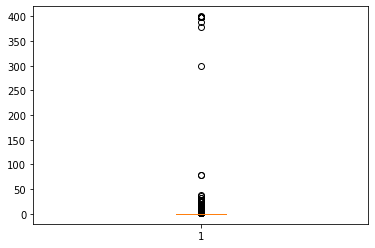

In [50]:
#Create a box plot for the price column

#?plt.boxplot

plt.boxplot(inp1.Price)

#to hide additional values/statements
#plt.show()


In [51]:
#Check the apps with price more than 200

inp1[inp1.Price>200]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [52]:
#Clean the Price column

inp1 = inp1[inp1.Price < 200]

inp1.Price.describe()


count    9344.000000
mean        0.273973
std         2.046255
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.000000
Name: Price, dtype: float64

<AxesSubplot:>

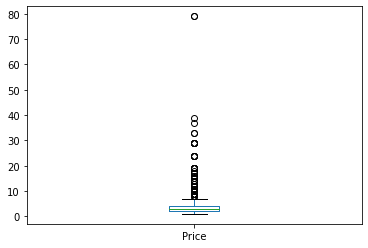

In [53]:
#Create a box plot for paid apps
#here we use a different way to plot i.e using Pandas inbult function plot

inp1[inp1.Price >0].Price.plot.box()

#second way is : using matplotlib's plt
#plt.boxplot(inp1[inp1.Price >0])



In [82]:
#Check the apps with price more than 30

inp1 = inp1[inp1.Price > 30]
(0, 13)


(0, 13)

In [83]:
#Clean the Price column again

inp1 = inp1[inp1.Price <  30]

inp1.shape


(0, 13)

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

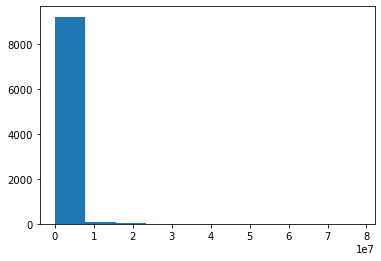

In [55]:
#Create a histogram of the Reviews

# ?plt.hist
plt.hist(inp1.Reviews)
plt.show()

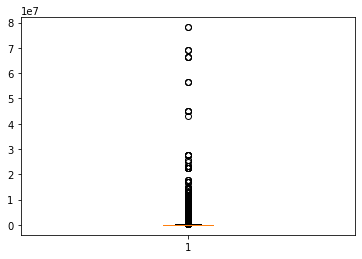

In [56]:
#Create a boxplot of the Reviews column

plt.boxplot(inp1.Reviews)
plt.show()

In [57]:
#Check records with 1 million reviews

inp1[inp1.Reviews >= 10000000]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [59]:
#Drop the above records

inp1 = inp1[inp1.Reviews <= 1000000]
inp1.shape


(8640, 13)

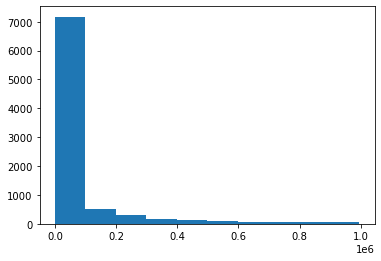

In [60]:
#Question - Create a histogram again and check the peaks

plt.hist(inp1.Reviews)
plt.show()

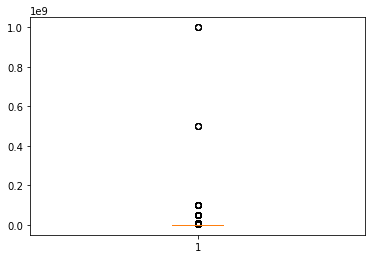

count    8.640000e+03
mean     4.285559e+06
std      2.863678e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [62]:
#Question - Create a box plot for the Installs column and report back the IQR


plt.boxplot(inp1.Installs)
plt.show()
inp1.Installs.describe()

In [63]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs

inp1 = inp1[inp1.Installs <= 100000000]
inp1.shape

(8630, 13)

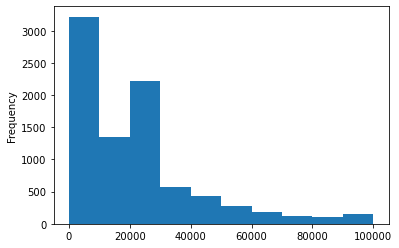

In [64]:
#Plot a histogram for Size as well.

inp1.Size.plot.hist()
plt.show()


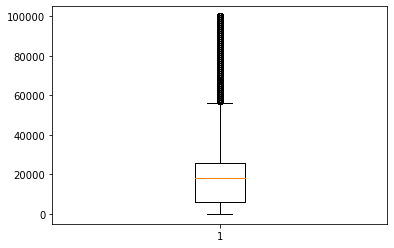

In [65]:
#Question - Create a boxplot for the Size column and report back the median value

plt.boxplot(inp1.Size)
plt.show()

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [66]:
#import the necessary libraries

import warnings
warnings.filterwarnings('ignore')


#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

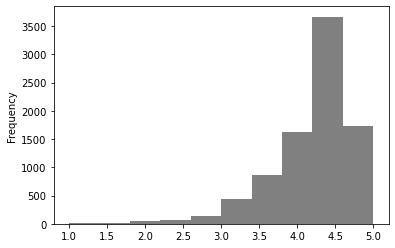

In [88]:
#Create a distribution plot for rating

inp1.Rating.plot.hist (color = 'grey' ,align='mid')

plt.show

#?plt.hist

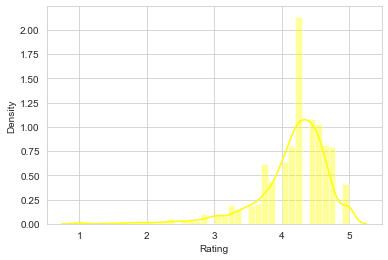

In [118]:
#Change the number of bins

import seaborn as sns

sns.distplot(inp1.Rating, color='yellow', bins = 40)
plt.show()



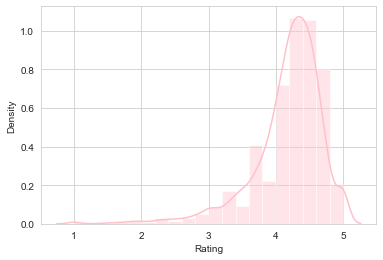

In [121]:
#Change the colour of bins to pink
sns.distplot(inp1.Rating, bins=20, color='pink')
plt.show()


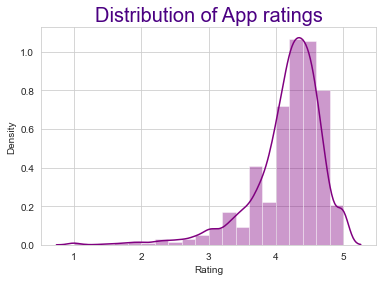

In [129]:
#Apply matplotlib functionalities

sns.distplot(inp1.Rating, bins=20, color='purple')
plt.title("Distribution of App ratings", fontsize=20 , color='indigo')
plt.show()


#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

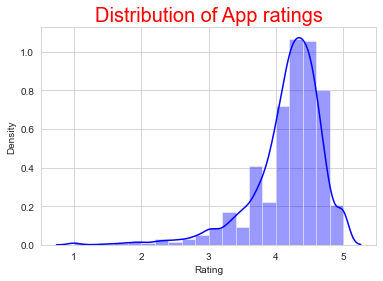

In [133]:
#Check all the styling options

#sns.set_style("dark")
#sns.set_style("darkgrid")
sns.set_style("whitegrid")
sns.distplot(inp1.Rating, bins=20, color='b')
plt.title("Distribution of App ratings", fontsize=20 , color='r')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

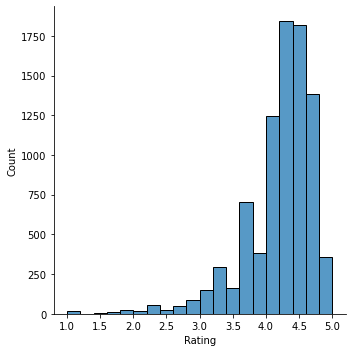

In [149]:
#Change the number of bins to 20


#matplotlib also has several styles
#plt.style.available

#plt.style.use("tableau-colorblind10")
#plt.style.use("ggplot")

#plt.style.use("dark_background")
sns.displot(inp1.Rating, bins= 20)
plt.show



#set things back to default

plt.style.use('default')
%matplotlib inline
sns.displot(inp1.Rating, bins= 20)
plt.show




#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [141]:
#Analyse the Content Rating column

inp1['Content Rating'].value_counts()


Everyone           6944
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [142]:
#Remove the rows with values which are less represented 

inp1= inp1[~inp1['Content Rating'].isin(["Adults only 18+", "Unrated"])]

#inp1 = inp1.drop(['Content rating'])

inp1.shape


(8626, 13)

In [143]:
#Reset the index

inp1.reset_index(inplace=True, drop=True)
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8626 entries, 0 to 8625
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8626 non-null   object 
 1   Category        8626 non-null   object 
 2   Rating          8626 non-null   float64
 3   Reviews         8626 non-null   int32  
 4   Size            8626 non-null   float64
 5   Installs        8626 non-null   int32  
 6   Type            8626 non-null   object 
 7   Price           8626 non-null   int32  
 8   Content Rating  8626 non-null   object 
 9   Genres          8626 non-null   object 
 10  Last Updated    8626 non-null   object 
 11  Current Ver     8626 non-null   object 
 12  Android Ver     8626 non-null   object 
dtypes: float64(2), int32(3), object(8)
memory usage: 775.1+ KB


In [145]:
#Check the apps belonging to different categories of Content Rating 

inp1['Content Rating'].value_counts()

Everyone        6944
Teen             928
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

<AxesSubplot:ylabel='Content Rating'>

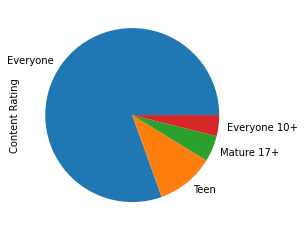

In [150]:
#Plot a pie chart

inp1['Content Rating'].value_counts().plot.pie()

<AxesSubplot:>

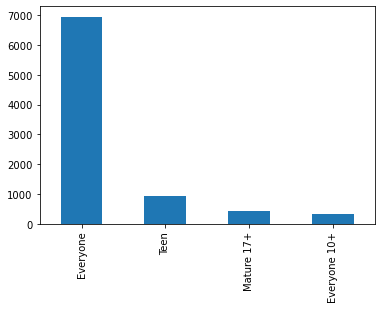

In [151]:
#Plot a bar chart

inp1['Content Rating'].value_counts().plot.bar()

<AxesSubplot:>

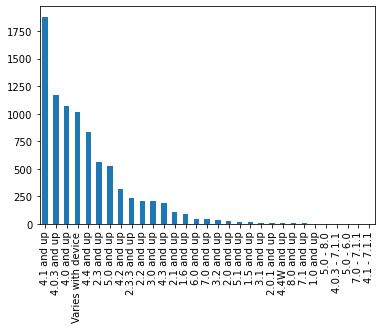

In [152]:
#Question - Plot a bar plot for checking the 4th highest Android version type

inp1['Android Ver'].value_counts().plot.bar()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

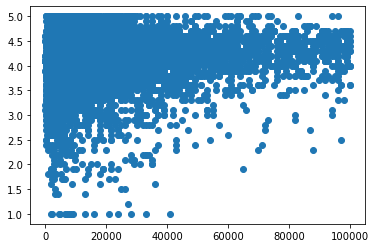

In [153]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating

plt.scatter(inp1.Size, inp1.Rating)
plt.show()

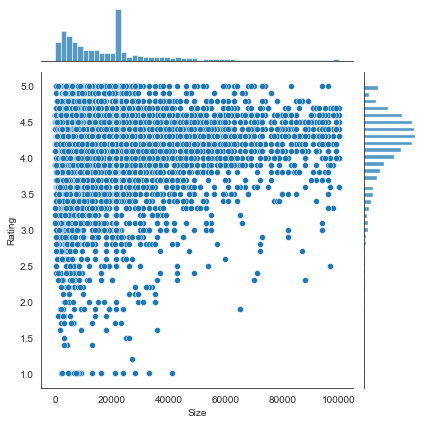

In [156]:
### Plot the same thing now using a jointplot

sns.set_style("white")
sns.jointplot(inp1.Size, inp1.Rating)
plt.show()

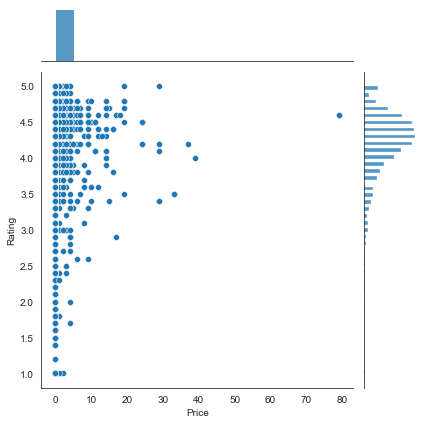

In [155]:
## Plot a jointplot for Price and Rating

sns.jointplot(inp1.Price, inp1.Rating)
plt.show()

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

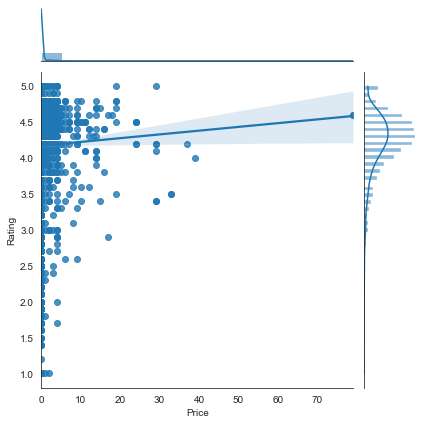

In [157]:
##Plot a reg plot for Price and Rating and observe the trend

sns.jointplot(inp1.Price, inp1.Rating, kind="reg")
plt.show()


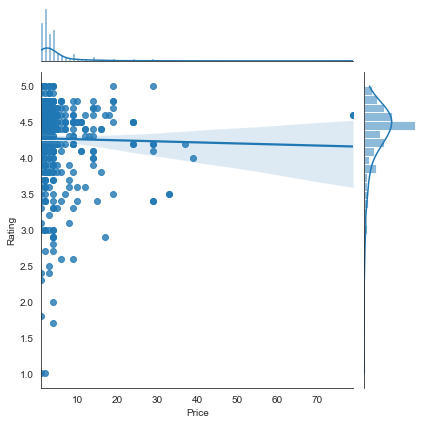

In [158]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.

sns.jointplot("Price", "Rating", data=inp1[inp1.Price>0], kind="reg")
plt.show()

**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

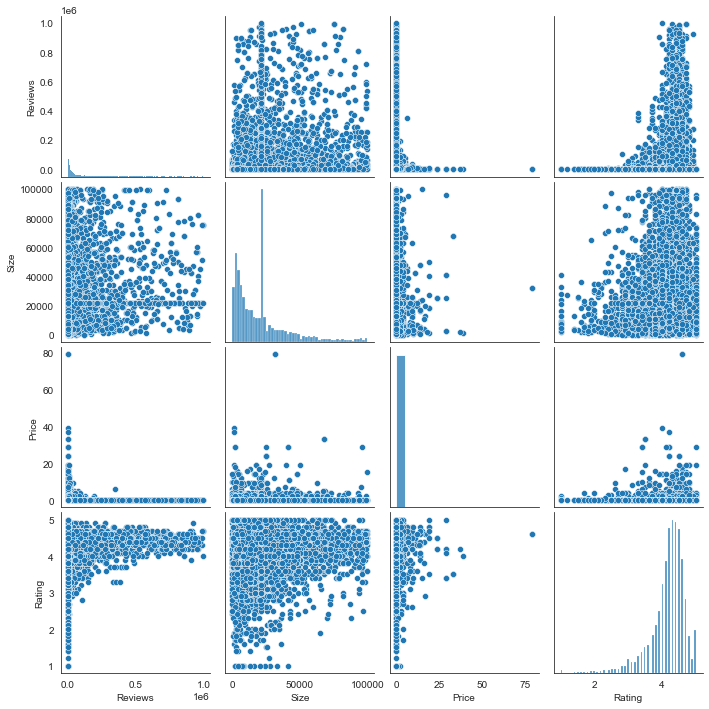

In [159]:
## Create a pair plot for Reviews, Size, Price and Rating
import seaborn as sns 
sns.pairplot(inp1[['Reviews', 'Size', 'Price', 'Rating']])
plt.show()

**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

<AxesSubplot:xlabel='Content Rating'>

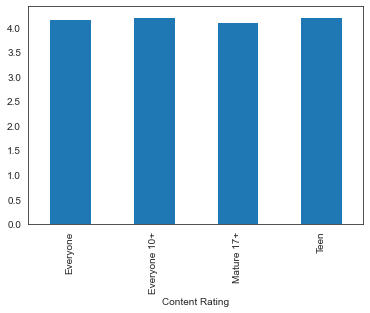

In [160]:
##Plot a bar plot of Content Rating vs Average Rating 

inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

<AxesSubplot:xlabel='Content Rating'>

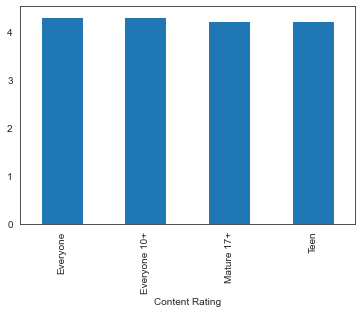

In [161]:
##Plot the bar plot again with Median Rating

inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()

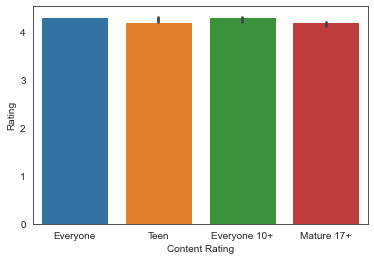

In [165]:
##Plot the above bar plot using the estimator parameter

sns.barplot(data=inp1, x='Content Rating', y='Rating', estimator=np.median)
plt.show()

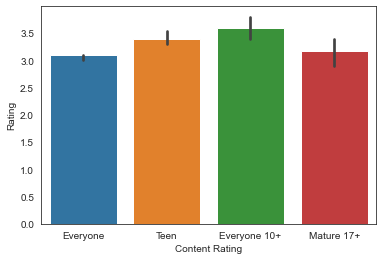

In [166]:
##Plot the bar plot with only the 5th percentile of Ratings

sns.barplot(data=inp1, x='Content Rating', y='Rating', estimator=lambda x: np.quantile(x, 0.05))
plt.show()

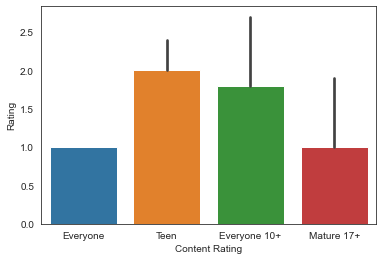

In [169]:
##Question - Plot the bar plot with the minimum Rating

sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator = np.min)
plt.show()


__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




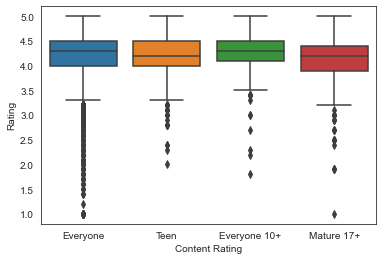

In [170]:
##Plot a box plot of Rating vs Content Rating

sns.boxplot(inp1['Content Rating'], inp1.Rating)
plt.show()


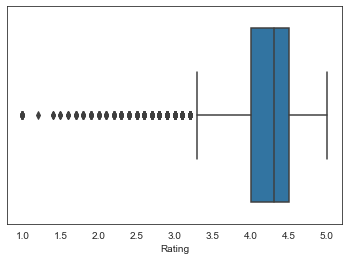

In [171]:
##Question - Plot a box plot for the Rating column only

sns.boxplot(inp1.Rating)
plt.show()


<AxesSubplot:xlabel='Genres', ylabel='Rating'>

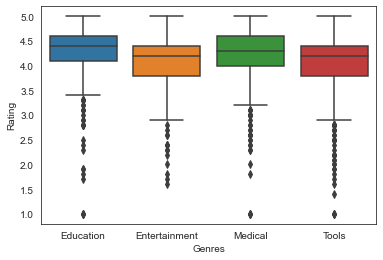

In [173]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres

inp1['Genres'].value_counts()
c = ['Tools','Entertainment','Medical','Education']
inp5= inp1[inp1['Genres'].isin(c)]

sns.boxplot(inp5['Genres'],inp1.Rating)

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [174]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut

inp1['Size_Bucket'] = pd.qcut(inp1.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ['VL', 'L','M','H', 'VH'])


In [175]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [176]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating

pd.pivot_table(data= inp1, index= 'Content Rating', columns = 'Size_Bucket',values = 'Rating')

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117514,4.158405,4.215784,4.171978,4.186155
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.143310,4.198131,4.246154


In [177]:
##Change the aggregation to median


pd.pivot_table(data= inp1, index= 'Content Rating', columns = 'Size_Bucket',values = 'Rating', aggfunc = np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


In [178]:
##Change the aggregation to 20th percentile


pd.pivot_table(data= inp1, index= 'Content Rating', columns = 'Size_Bucket', aggfunc=lambda x: np.quantile(x, 0.2))


Installs                                Price              ...  \
Size_Bucket          VL      L       M       H      VH    VL  L  M  H VH  ...   
Content Rating                                                            ...   
Everyone           1000   5000   10000    5000   10000     0  0  0  0  0  ...   
Everyone 10+       3400  10000  100000  100000  100000     0  0  0  0  0  ...   
Mature 17+         1000   4200  100000   10000  100000     0  0  0  0  0  ...   
Teen               1000   1000  100000   50000  100000     0  0  0  0  0  ...   

               Reviews                                   Size          \
Size_Bucket         VL      L       M       H      VH      VL       L   
Content Rating                                                          
Everyone          18.0   39.0   420.6    63.0   182.6  1300.0  5900.0   
Everyone 10+      45.0  271.8  3684.0  2894.0  1833.8  2700.0  6480.0   
Mature 17+        32.0   61.4  1017.0   174.0  2032.0  2380.0  5320.0   
Teen              14.0   51.4  3464.2   711.0  1687.8  2260.0  6300.0   

                                           
Size_Bucket           M        H       VH  
Content Rating                             
Everyone        16000.0  23000.0  38000.0  
Everyone 10+    18000.0  23000.0  38400.0  
Mature 17+      15000.0  24000.0  40200.0  
Teen            16000.0  23000.0  41000.0  

[4 rows x 25 columns]

In [183]:
##Store the pivot table in a separate variable

res = pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x: np.quantile(x,0.2))



<function matplotlib.pyplot.show(close=None, block=None)>

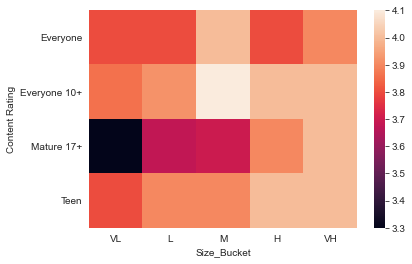

In [184]:
##Plot a heat map

sns.heatmap(res)
plt.show

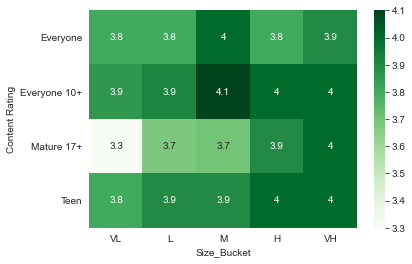

In [185]:
##Apply customisations

sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

In [201]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating

#inp1.Reviews.head()

inp1['Review_buckets'] = pd.qcut(inp1.Reviews, [0, 0.2, 0.4, 0.6, 0.8, 1], ['VL', 'L','M','H','VH'])
pd.pivot_table(data= inp1, index= 'Reviews', columns = 'Review_buckets',values = 'Rating')



Review_buckets,VL,L,M,H,VH
Reviews,,,,,
1,4.179104,NaN,NaN,NaN,NaN
2,4.123457,NaN,NaN,NaN,NaN
3,4.276923,NaN,NaN,NaN,NaN
4,4.269863,NaN,NaN,NaN,NaN
5,4.105405,NaN,NaN,NaN,NaN
...,...,...,...,...,...
990586,NaN,NaN,NaN,NaN,4.7
990663,NaN,NaN,NaN,NaN,4.7
990723,NaN,NaN,NaN,NaN,4.7


In [205]:
res = pd.pivot_table(data = inp1, index= 'Review_buckets', columns = 'Rating', aggfunc = lambda x: np.min)

In [206]:
sns.heatmap(res, annot=True)
plt.show()

TypeError: float() argument must be a string or a number, not 'function'

### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [207]:
## Extract the month from the Last Updated Date

inp1['Last Updated'].head()


0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [210]:
## Find the average Rating across all the months
inp1['updated_month'] = pd.to_datetime(inp1['Last Updated']).dt.month
inp1.groupby(['updated_month'])['Rating'].mean()


updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148017
5     4.153375
6     4.173396
7     4.222959
8     4.271086
9     4.041406
10    4.009494
11    4.102685
12    4.065350
Name: Rating, dtype: float64

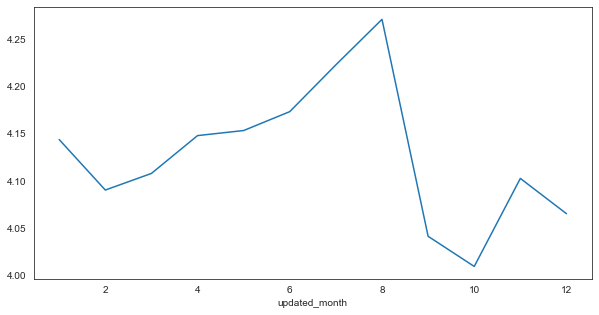

In [211]:
## Plot a line graph

plt.figure(figsize= [10,5])
inp1.groupby(['updated_month'])['Rating'].mean().plot()
plt.show()



#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [213]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs

pd.pivot_table(data= inp1, values ='Installs', index ="updated_month", columns= "Content Rating", aggfunc= sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,9.253874e+08,105282000.0,9701210.0,4.415901e+07
2,5.453720e+08,19821000.0,13021500.0,3.959771e+07
3,6.953655e+08,30322510.0,9111100.0,7.985031e+07
4,9.733713e+08,23300000.0,5259000.0,1.616194e+08
5,1.861068e+09,118173500.0,50140100.0,2.026896e+08
6,2.427173e+09,317727100.0,145257200.0,4.157166e+08
7,7.771111e+09,456556000.0,419491910.0,1.943557e+09
8,5.930943e+09,215821000.0,312981700.0,1.257856e+09
9,2.603404e+08,24931100.0,2201010.0,2.248310e+07


In [214]:
##Store the table in a separate variable

monthly = pd.pivot_table(data= inp1, values ='Installs', index ="updated_month", columns= "Content Rating", aggfunc= sum)


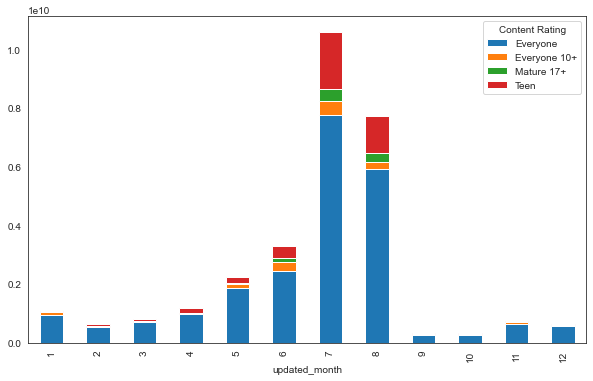

In [215]:
##Plot the stacked bar chart.

monthly.plot(kind= 'bar', stacked ='True', figsize=[10,6])
plt.show()

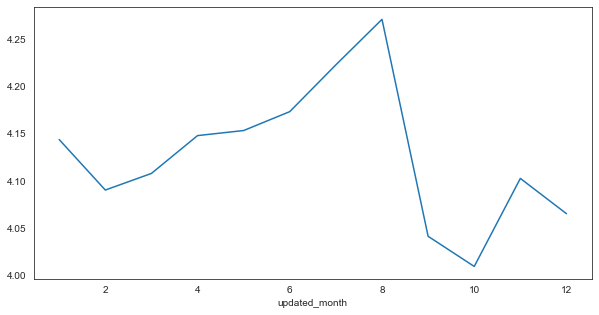

In [216]:
plt.figure(figsize =[10,5])
inp1.groupby(['updated_month'])['Rating'].mean().plot()
plt.show()

In [217]:
##Plot the stacked bar chart again wrt to the proportions.

monthly_perc = monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x: x/x.sum(), axis=1)


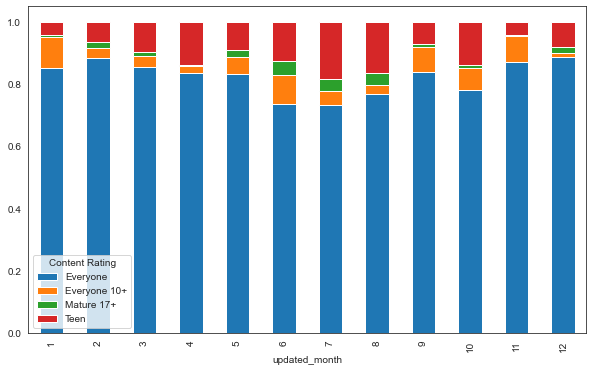

In [218]:
monthly_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [219]:
#Install plotly

!pip install plotly


In [221]:
#Take the table you want to plot in a separate variable

res = inp1.groupby(["updated_month"])[['Rating']].mean()
res.reset_index(inplace=True)
res

,updated_month,Rating
0,1,4.143842
1,2,4.090385
2,3,4.107963
3,4,4.148017
4,5,4.153375
5,6,4.173396
6,7,4.222959
7,8,4.271086
8,9,4.041406
9,10,4.009494


In [222]:
#Import the plotly libraries

import plotly.express as px

In [231]:
#Prepare the plot

fig = px.line(res, x= "updated_month", y="Rating", title="Montly average rating")
fig.show()
